<center><font size="6" face="Garamond"><strong>CSE2706: Digital Image Processing Lab</strong></font></center>
<br>
<center><font size="6" face="Garamond">7th Semester Final Practical Exam</font></center>
<br>
<center><font size="5" face="Garamond">Siddhartha Dutta | A70405217037 | BCSE1732</font></center>
<hr>

In [1]:
# Importing All Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

<p><font size="4" face="Garamond"><strong>Objective - </strong> Q1. To perform the following operations:
    <ol>
        <li>Morphological Image Processing (Erosion, Dilation, Opening and Closing)</li>
        <li>Contrast Stretching</li>
    </ol>
</font></p>

<p><font size="4" face="Garamond"><strong>Morphological Image Processing</strong><br>
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is the original image, second one is called structuring element or kernel which decides the nature of operation. The image nature in this experiment has foreground with pixel intensities 255 and background with pixel intensities as 0, as shown below.
    <ol>
        <li>Erosion: It involves the eroding away of the boundaries of the foreground object. The pixel in the original image will be considered only if all the pixels under the kernel is 1, otherwise it is eroded.</li>
        <li>Dilation: It is the opposite of erosion where a pixel element is considered if atleast one pixel under the kernel is 1. So it increases the thickness of the foreground image.</li>
        <li>Opening: It involves the erosion operation followed by the dilation operation. It is useful in removing noise.</li>
        <li>Closing: It is the reverse of opening where the dilation operation is following by erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.</li>
    </ol>
</font></p>

Kernel for Morphological Transformations
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


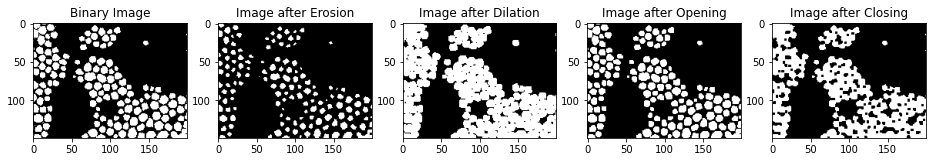

In [2]:
# Reading Input Image & Converting to Binary
image_gray = cv2.imread('example_binary.png', cv2.IMREAD_GRAYSCALE)
(thresh, image) = cv2.threshold(src=image_gray, 
                                thresh=128, 
                                maxval=255, 
                                type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Creating a Kernel for Morphological Operations
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
print("Kernel for Morphological Transformations\n", kernel)

# Performing Morphological Operations
erosion = cv2.erode(src=image, kernel=kernel, iterations=1)
dilation = cv2.dilate(src=image, kernel=kernel, iterations=1)
opening = cv2.morphologyEx(src=image, op=cv2.MORPH_OPEN, kernel=kernel)
closing = cv2.morphologyEx(src=image, op=cv2.MORPH_CLOSE, kernel=kernel)

# Displaying Results
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)
ax1.imshow(image, cmap='gray'), ax1.title.set_text('Binary Image')
ax2.imshow(erosion, cmap='gray'), ax2.title.set_text('Image after Erosion')
ax3.imshow(dilation, cmap='gray'), ax3.title.set_text('Image after Dilation')
ax4.imshow(opening, cmap='gray'), ax4.title.set_text('Image after Opening')
ax5.imshow(closing, cmap='gray'), ax5.title.set_text('Image after Closing')
plt.show()

<p><font size="4" face="Garamond"><strong>Contrast Stretching</strong><br>
Contrast stretching is a piecewise linear transformation function, which is a type of gray level transformation that is used for image enhancement in the spatial domain. Low contrast images may result due to the following:
    <ul>
        <li>Poor illumination</li>
        <li>Lack of dynamic range in the imaging sensor</li>
        <li>Wrong settings of the lens aperture during acquisition</li>
    </ul>
Constrast stretching is a process that expands the range of intensity levels in an image so that it spans full intensity range of the recording medium or display device. In the practical below, a transformation function is applied to pixel intensities between (70, 0) and (140, 255) to produce spread in the intensity. It increases the dynamic range of grey levels in the image.
</font></p>

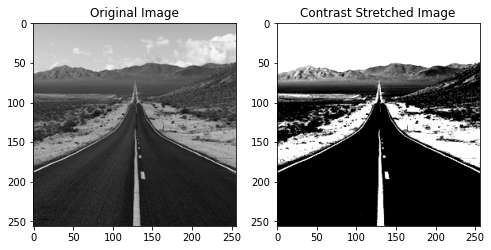

In [3]:
# Reading Input Image
image = cv2.imread('road.bmp', cv2.IMREAD_GRAYSCALE)

# Parameters
r1, s1 = 70, 0
r2, s2 = 140, 255

# Perform Contrast Stretching
pixels = image.ravel()
contrastStretched = []
for pixel in pixels:
    if pixel >= 0 and pixel <= r1:
        new_pixel = (s1 / r1) * pixel
    elif pixel > r1 and pixel <= r2:
        new_pixel = ((s2 - s1)/(r2 - r1)) * (pixel - r1) + s1
    else:
        new_pixel = ((255 - s2)/(255 - r2)) * (pixel - r2) + s2 
    contrastStretched.append(new_pixel)

contrastStretched = np.array(contrastStretched)
contrastStretched = np.resize(a=contrastStretched, new_shape=image.shape)

# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray'), ax1.title.set_text('Original Image')
ax2.imshow(contrastStretched, cmap='gray'), ax2.title.set_text('Contrast Stretched Image')
plt.show()

<hr>
<p><font size="4" face="Garamond"><strong>Objective - </strong>Q2. To perform the following spatial filters for local enhancement:
    <ol>
        <li>Gaussian Filter</li>
        <li>Unsharp Mask and High Boost Filter</li>
    </ol>
</font></p>

<p><font size="4" face="Garamond"><strong>Gaussian Filter</strong><br>
A Gaussian filter is a linear filter which is usually used to blur the image or to reduce detail and noise. It uses a kernel that represents the shape of a Gaussian or bell-shaped hump. The Gaussian filter outputs a weighted average of each pixel’s neighborhood, with the average weighted more towards the value of the central pixels. In the practical below, the value of sigma is taken to be 1 for a 3x3 Gaussian kernel.
</font></p>

Gaussian Kernel σ=1
 [[0.00013383 0.00443186 0.05399113]
 [0.24197145 0.39894347 0.24197145]
 [0.05399113 0.00443186 0.00013383]]


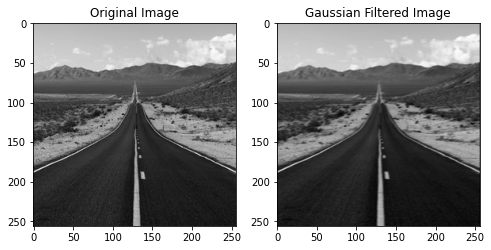

In [4]:
# Reading Input Image
image = cv2.imread('road.bmp', cv2.IMREAD_GRAYSCALE)

# Creating a 3x3 Gaussian Kernel
gaussianKernel = cv2.getGaussianKernel(ksize=9, sigma=1)
gaussianKernel = np.resize(a=gaussianKernel, new_shape=(3,3))
print('Gaussian Kernel σ=1\n', gaussianKernel)

# Applying the Gaussian Filter
gaussianFiltered = cv2.filter2D(src=image, 
                                ddepth=-1, 
                                kernel=gaussianKernel, 
                                borderType=cv2.BORDER_CONSTANT)

# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray'), ax1.title.set_text('Original Image')
ax2.imshow(gaussianFiltered, cmap='gray'), ax2.title.set_text('Gaussian Filtered Image')
plt.show()

<p><font size="4" face="Garamond"><strong>Unsharp Mask and High Boost Filter</strong><br>
Unsharp masking is generally used for image sharpening. Sharpening filters are very sensitive to noise involves emphasizing details and enhances the edges of objects in an image. Unsharp masking involves the following steps:
    <ol>
        <li>Blurring the original image.</li>
        <li>Subtracting the blurred image from the original image to create the mask.</li>
        <li>Adding the mask to the original image.
            g(x,y) = f(x,y) + k • g<sub>mask</sub>(x,y) </li> 
    </ol>
When k = 1, unsharp masking is performed. When k > 1, the process is known as highboost filtering.
</font></p>

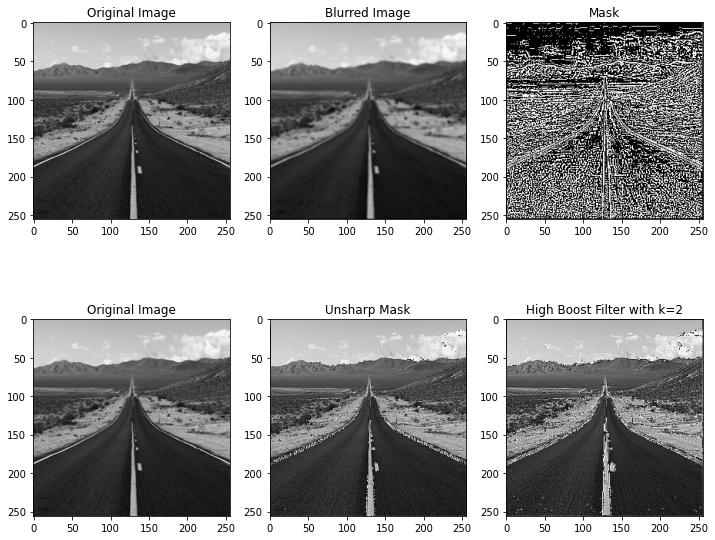

In [5]:
# Reading Input Image
image = cv2.imread('road.bmp', cv2.IMREAD_GRAYSCALE)

# Step 1: Blurring Image 
averageKernel = [[1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9],
                 [1/9, 1/9, 1/9]]
averageKernel = np.array(averageKernel)
blurredImage = cv2.filter2D(src=image, 
                            ddepth=-1, 
                            kernel=averageKernel, 
                            borderType=cv2.BORDER_CONSTANT)

# Step 2: Subtracting Blurred Image from Original to Create Mask
mask = image - blurredImage

# Step 3: Adding Mask to Original Image
unsharpedMask = image + (1 * mask) # k = 1 for Unsharp Masking
k = 2
highBoostFilter = image + (k * mask) # k > 1 for High Boost Filter

# Displaying Results
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
ax1.imshow(image, cmap='gray'), ax1.title.set_text('Original Image')
ax2.imshow(blurredImage, cmap='gray'), ax2.title.set_text('Blurred Image')
ax3.imshow(mask, cmap='gray'), ax3.title.set_text('Mask')
ax4.imshow(image, cmap='gray'), ax4.title.set_text('Original Image')
ax5.imshow(unsharpedMask, cmap='gray'), ax5.title.set_text('Unsharp Mask')
ax6.imshow(highBoostFilter, cmap='gray'), ax6.title.set_text(f'High Boost Filter with k={k}')
plt.show()

<hr>